In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy import stats
from statsmodels.stats import weightstats as wsm
from statsmodels.stats.proportion import proportion_confint

In [18]:
df = pd.read_csv('credit_card_default_analysis.csv')

In [19]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [20]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [11]:
df.shape

(30000, 25)

In [12]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,0.356767,0.320033,0.304067,0.258767,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,0.760594,0.801727,0.790589,0.761113,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


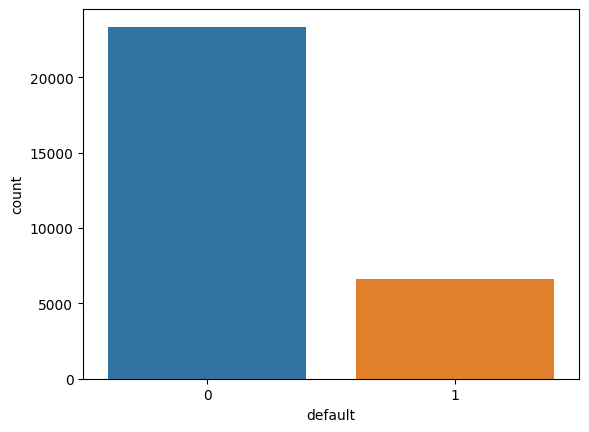

In [23]:
sns.countplot(x='default', data=df)
plt.show()

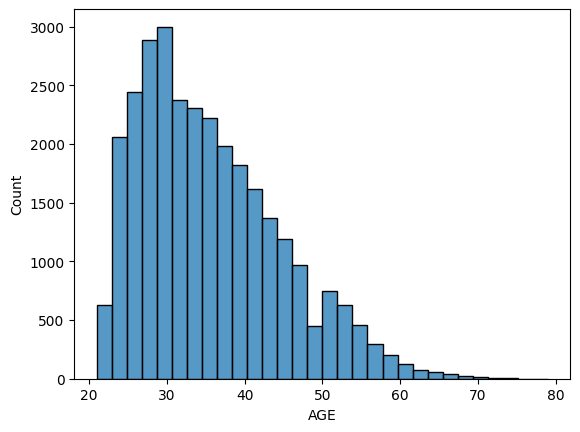

In [16]:
sns.histplot(x='AGE', data=df, bins=30)
plt.show()

1․ Limit-bal

1․a

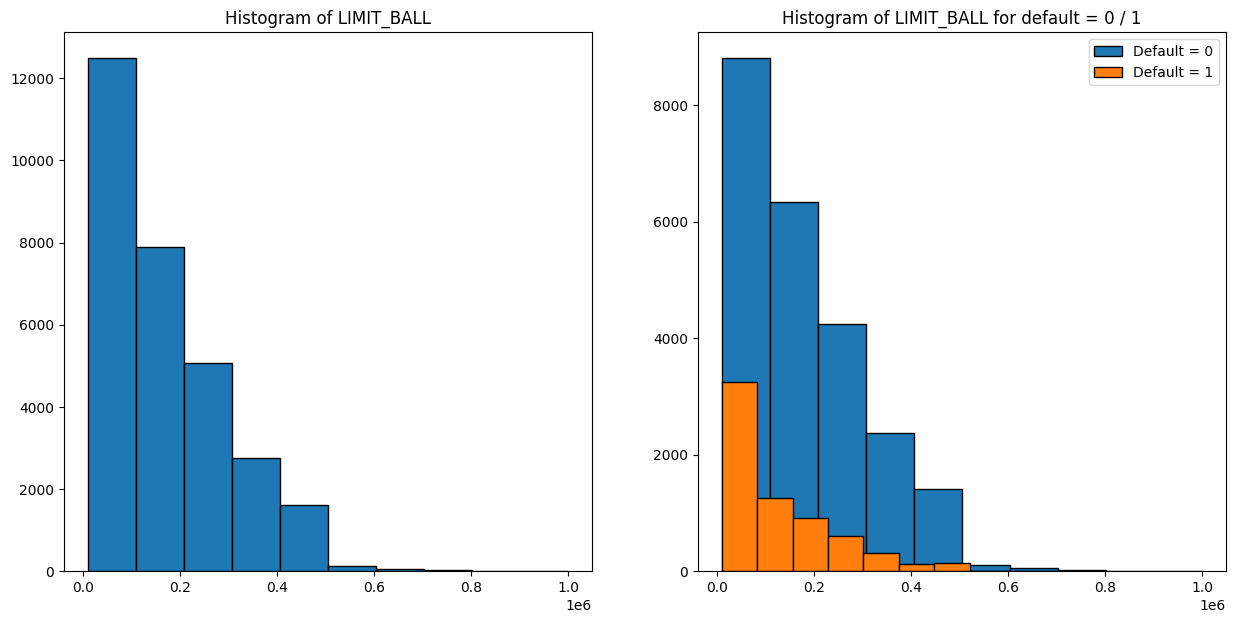

In [66]:
#histogram of LIMIT_BAL distribution
plt.figure(1, figsize=(15,7))

plt.subplot(121)
plt.title('Histogram of LIMIT_BALL')
plt.hist(df['LIMIT_BAL'], edgecolor='k')

plt.subplot(122)
plt.title('Histogram of LIMIT_BALL for default = 0 / 1')
plt.hist(df.LIMIT_BAL.loc[df.default == 0], edgecolor='k', label='Default = 0')
plt.hist(df.LIMIT_BAL.loc[df.default == 1], edgecolor='k', label='Default = 1')
plt.legend()

In [69]:
#samples of LIMIT_BAL for default = 0/1
lim_bal_0 = df.LIMIT_BAL.loc[df.default == 0]
lim_bal_1 = df.LIMIT_BAL.loc[df.default == 1]

print('Median LIMIT_BAL for default = 0: %.0f' % lim_bal_0.median())
print('Median LIMIT_BAL for default = 1: %.0f' % lim_bal_1.median())

Median LIMIT_BAL for default = 0: 150000
Median LIMIT_BAL for default = 1: 90000


In [70]:
def zconfint_binom(n, p, alpha=0.05):
    q = 1 - p
    m = n * p
    var = n * p * q
    z_stat = stats.norm.ppf(1 - alpha / 2)
    l_bound = int(round(m - z_stat * np.sqrt(var)))
    u_bound = int(round(m + z_stat * np.sqrt(var)))
    return (l_bound, u_bound)

In [71]:
#confidence intervals estimation
lim_bal_0_s = np.sort(lim_bal_0.values)
lim_bal_1_s = np.sort(lim_bal_1.values)

l_ind_0, u_ind_0 = zconfint_binom(len(lim_bal_0_s), 0.5)
l_ind_1, u_ind_1 = zconfint_binom(len(lim_bal_1_s), 0.5)

print('Conf. int. median LIMIT_BAL for default = 0: [%d, %d]' % (lim_bal_0_s[l_ind_0], lim_bal_0_s[u_ind_0]))
print('Conf. int. median LIMIT_BAL for default = 1: [%d, %d]' % (lim_bal_1_s[l_ind_1], lim_bal_1_s[u_ind_1]))

Conf. int. median LIMIT_BAL for default = 0: [150000, 150000]
Conf. int. median LIMIT_BAL for default = 1: [80000, 90000]


Ինչպես երևում է ինտերվալների գնահատումից, միջինները չեն համընկնում: Վարկառուները, ովքեր չեն մարում վարկը, սովորաբար ավելի փոքր գումար են վերցնում:

1.b

In [81]:
def permutation_t_stat_ind(sample1, sample2):
    return np.mean(sample1) - np.mean(sample2)

In [82]:
def get_random_combinations(n1, n2, max_combinations):
    index = list(range(n1 + n2))
    indices = set([tuple(index)])
    for i in range(max_combinations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return [(index[:n1], index[n1:]) for index in indices]

In [83]:
def permutation_zero_dist_ind(sample1, sample2, max_combinations=None):
    joined_sample = np.hstack((sample1, sample2))
    n1 = len(sample1)
    n = len(joined_sample)
    
    if max_combinations:
        indices = get_random_combinations(n1, len(sample2), max_combinations)
    else:
        indices = [(list(index), filter(lambda i: i not in index, range(n))) \
                    for index in itertools.combinations(range(n), n1)]
    
    distr = [joined_sample[list(i[0])].mean() - joined_sample[list(i[1])].mean() \
             for i in indices]
    return distr

In [84]:
def permutation_test(sample1, sample2, max_permutations=None, alternative='two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_ind(sample1, sample2)
    
    zero_distr = permutation_zero_dist_ind(sample1, sample2, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

In [86]:
print('p-value: %f' % permutation_test(lim_bal_0, lim_bal_1, max_permutations=1000))

p-value: 0.001000


p-value-ն բավականին փոքր է, և զրոյական վարկածը մերժվում է 0,05 նշանակալիության մակարդակում:

2. Sex

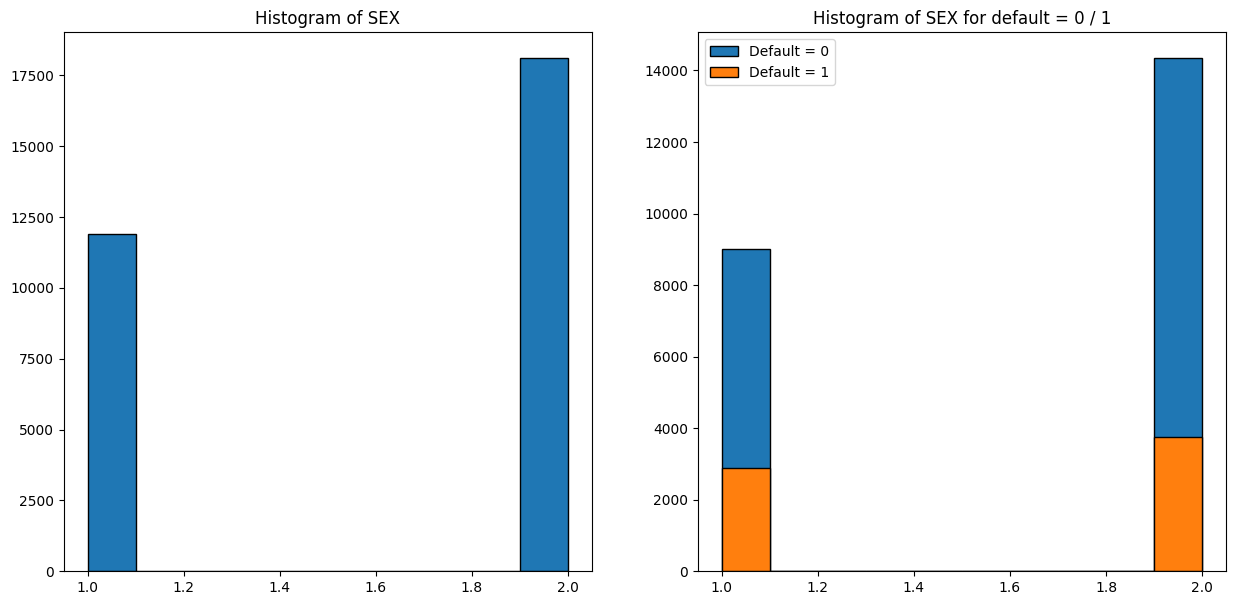

In [50]:
#histogram of SEX distribution
plt.figure(1, figsize=(15,7))

plt.subplot(121)
plt.title('Histogram of SEX')
plt.hist(df['SEX'], edgecolor='k')

plt.subplot(122)
plt.title('Histogram of SEX for default = 0 / 1')
plt.hist(df.SEX.loc[df.default == 0], edgecolor='k', label='Default = 0')
plt.hist(df.SEX.loc[df.default == 1], edgecolor='k', label='Default = 1')
plt.legend()

In [51]:
#samples of SEX for default = 0/1
sex_0 = df.SEX.loc[df.default == 0].values
sex_1 = df.SEX.loc[df.default == 1].values

#proportions of men to women in samples
m_to_w_0 = np.where(sex_0 == 1)[0].shape[0] / sex_0.shape[0]
m_to_w_1 = np.where(sex_1 == 1)[0].shape[0] / sex_1.shape[0]

print('Prop. of men for default = 0: %.4f' % m_to_w_0)
print('Prop. of men for default = 1: %.4f' % m_to_w_1)

Prop. of men for default = 0: 0.3859
Prop. of men for default = 1: 0.4329


In [52]:
#confident intervals for proportions
conf_int_0 = proportion_confint(np.where(sex_0 == 1)[0].shape[0], sex_0.shape[0])
conf_int_1 = proportion_confint(np.where(sex_1 == 1)[0].shape[0], sex_1.shape[0])

print('Conf. int. for prop. of men or default = 0: [%.4f, %.4f]' % conf_int_0)
print('Conf. int. for prop. of men or default = 1: [%.4f, %.4f]' % conf_int_1)

Conf. int. for prop. of men or default = 0: [0.3796, 0.3921]
Conf. int. for prop. of men or default = 1: [0.4210, 0.4449]


Ինչպես երևում է ինտերվալների գնահատումներից, միջակայքերը իրենք չեն հատվում, հետևաբար սեռային կազմը տարբեր է։

In [53]:
def proportions_confint_diff_ind(sample1, sample2, alpha = 0.05):    
    z = stats.norm.ppf(1 - alpha / 2.)   
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1) / len(sample1) + p2 * (1 - p2) / len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1) / len(sample1) + p2 * (1 - p2) / len(sample2))
    
    return (left_boundary, right_boundary)

In [54]:
print('Conf. int. for difference: [%f, %f]' % proportions_confint_diff_ind(np.abs(sex_0-2), np.abs(sex_1-2)))

Conf. int. for difference: [-0.060548, -0.033635]


In [55]:
def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

In [56]:
def proportions_diff_z_test(z_stat, alternative='two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - stats.norm.cdf(z_stat)

In [57]:
print('p-value: %.15f' % proportions_diff_z_test(proportions_diff_z_stat_ind(np.abs(sex_0-2), np.abs(sex_1-2))))

p-value: 0.000000000004473


Զրոյական վարկածն այն է, որ զգալի տարբերություն չկա արական և իգական սեռի հաճախորդների միջև այն պոպուլյացիայի մեջ, որտեղից ընտրվել են նմուշները: Այլընտրանքային վարկածն այն է, որ մեդիանայում զգալի տարբերություն կա:
Ելնելով թեստի արդյունքից՝ մենք ստացանք p-value, որը փոքր է սովորական նշանակության մակարդակից՝ 0,05:
Գենդերային հավասարության վարկածը մերժվում է։

3․ Education

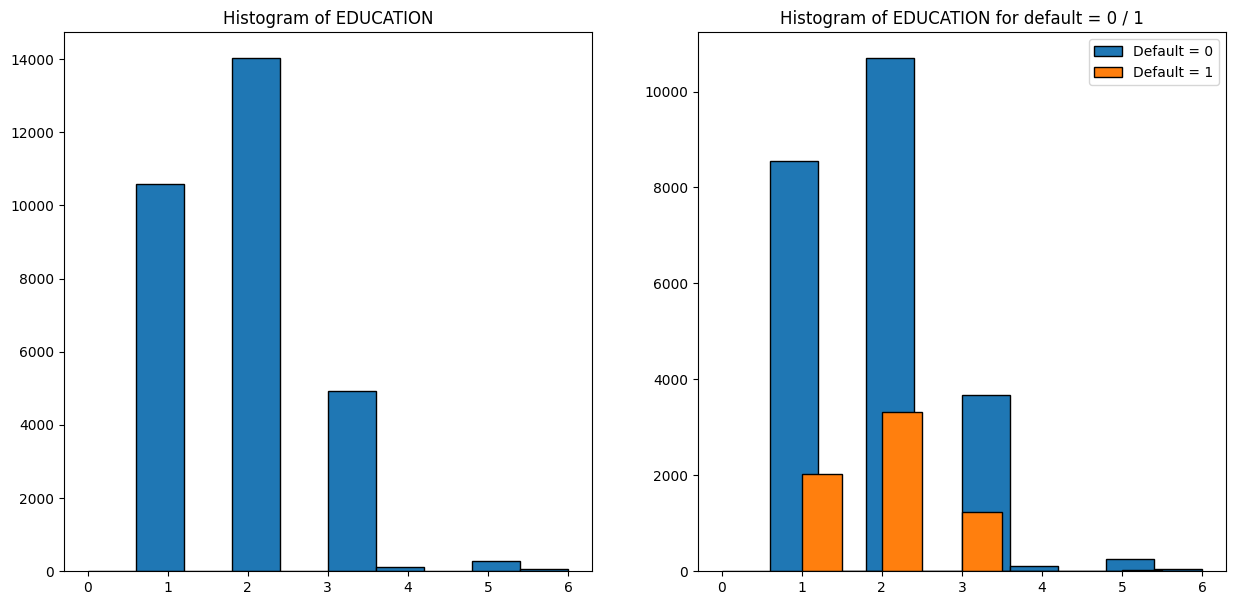

In [58]:
plt.figure(1, figsize=(15,7))

plt.subplot(121)
plt.title('Histogram of EDUCATION')
plt.hist(df['EDUCATION'], edgecolor='k')

plt.subplot(122)
plt.title('Histogram of EDUCATION for default = 0 / 1')
plt.hist(df.EDUCATION.loc[df.default == 0], edgecolor='k', label='Default = 0')
plt.hist(df.EDUCATION.loc[df.default == 1], edgecolor='k', label='Default = 1')
plt.legend()

Prop. of def.=0 for education=0: 1.00
Prop. of def.=0 for education=1: 0.81
Prop. of def.=0 for education=2: 0.76
Prop. of def.=0 for education=3: 0.75
Prop. of def.=0 for education=4: 0.94
Prop. of def.=0 for education=5: 0.94
Prop. of def.=0 for education=6: 0.84


(0.0, 6.0, 0.5, 1.0)

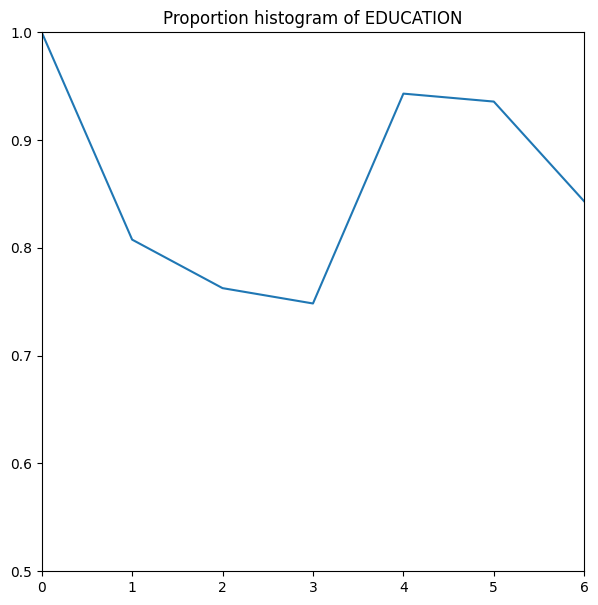

In [59]:
#samples of EDUCATION for default = 0/1
edu = df.EDUCATION
edu_0 = df.EDUCATION.loc[df.default == 0]
edu_1 = df.EDUCATION.loc[df.default == 1]

#proportions of credit returns
edu_prop = np.empty( (len(np.unique(edu_0)), 2) )
for i, ed_val in enumerate(np.unique(edu)):
    edu_prop[i, 0] = ed_val
    edu_prop[i, 1] = edu_0[edu_0 == ed_val].shape[0] / (edu_0[edu_0 == ed_val].shape[0] + edu_1[edu_1 == ed_val].shape[0])

for ed_val, prop in edu_prop:
    print('Prop. of def.=0 for education=%d: %.2f' % (ed_val, prop))

#histogram of EDUCATION proportions distribution
plt.figure(1, figsize=(7,7))
plt.title('Proportion histogram of EDUCATION')
plt.plot(edu_prop[:,0], edu_prop[:,1])
plt.axis([0, 6, 0.5, 1])

Ամենաքիչը վարկը վերադարձնում են դպրոցականները և ուսանողները(2, 3): Միշտ վերադարձնում են դոկտորները(0):

In [73]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(df['EDUCATION'], df['default'])

print("p-value:", p_value)

p-value: 0.0


In [61]:
prop_mean = edu_prop[:,1].mean()
print('Mean prop value: %.2f' % prop_mean)

Mean prop value: 0.86


In [62]:
#sample sizes for different education levels
edu_num_0 = np.array([edu_0[edu_0 == ed_val].shape[0] for ed_val in range(7)])
edu_num_1 = np.array([edu_1[edu_1 == ed_val].shape[0] for ed_val in range(7)])
edu_num = edu_num_0 + edu_num_1

for i in range(7):
    print('Edu lvl %d: %d / %d | %d' % (i, edu_num_0[i], edu_num_1[i], edu_num[i]))
print('Legend: deafault = 0 / default = 1 | total')

Edu lvl 0: 14 / 0 | 14
Edu lvl 1: 8549 / 2036 | 10585
Edu lvl 2: 10700 / 3330 | 14030
Edu lvl 3: 3680 / 1237 | 4917
Edu lvl 4: 116 / 7 | 123
Edu lvl 5: 262 / 18 | 280
Edu lvl 6: 43 / 8 | 51
Legend: deafault = 0 / default = 1 | total


In [63]:
# table for expected frequencies
exp_freq = np.array([prop_mean * edu_num[i] for i in range(7)])

for i in range(7):
    print('Edu lvl %d: %d / %d | %d' % (i, exp_freq[i], edu_num_0[i], edu_num_0[i] - exp_freq[i]))
print('Legend: exp freq / obs freq = 1 | delta')

Edu lvl 0: 12 / 14 | 1
Edu lvl 1: 9134 / 8549 | -585
Edu lvl 2: 12107 / 10700 | -1407
Edu lvl 3: 4243 / 3680 | -563
Edu lvl 4: 106 / 116 | 9
Edu lvl 5: 241 / 262 | 20
Edu lvl 6: 44 / 43 | -1
Legend: exp freq / obs freq = 1 | delta


4․ Marriage

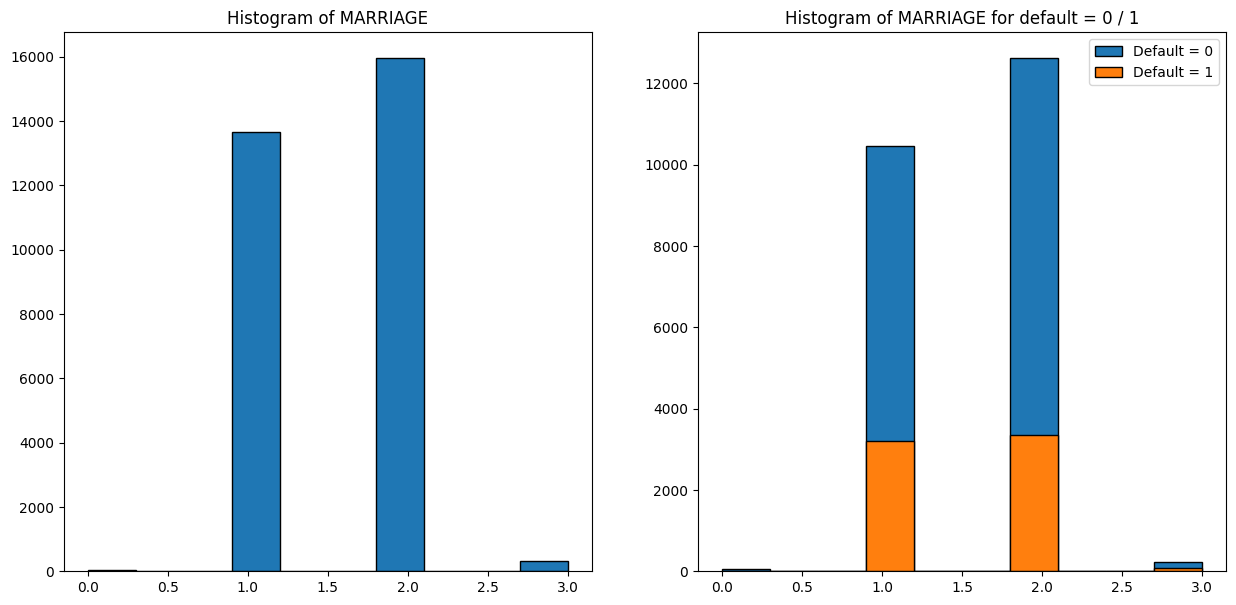

In [43]:
#histogram of MARRIAGE
plt.figure(1, figsize=(15,7))

plt.subplot(121)
plt.title('Histogram of MARRIAGE')
plt.hist(df['MARRIAGE'], edgecolor='k')

plt.subplot(122)
plt.title('Histogram of MARRIAGE for default = 0 / 1')
plt.hist(df.MARRIAGE.loc[df.default == 0], edgecolor='k', label='Default = 0')
plt.hist(df.MARRIAGE.loc[df.default == 1], edgecolor='k', label='Default = 1')
plt.legend()

In [45]:
#samples of MARRIAGE for default = 0/1
mar = df.MARRIAGE
mar_0 = df.MARRIAGE.loc[df.default == 0]
mar_1 = df.MARRIAGE.loc[df.default == 1]

print('Value counts for marriage:')
mar.value_counts()

Value counts for marriage:


2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [46]:
conf_table = np.empty( (len(mar.value_counts()), 2) )
for i in range(len(mar.value_counts())):
    conf_table[i, 0] = len(mar_0.loc[mar_0 == i])
    conf_table[i, 1] = len(mar_1.loc[mar_1 == i])
conf_table

array([[4.9000e+01, 5.0000e+00],
       [1.0453e+04, 3.2060e+03],
       [1.2623e+04, 3.3410e+03],
       [2.3900e+02, 8.4000e+01]])

In [47]:
def cramers_stat(confusion_matrix):
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    return np.sqrt(chi2 / (n*(min(confusion_matrix.shape)-1)))

In [48]:
print('V Cramer stat value: %.4f' % cramers_stat(conf_table))

V Cramer stat value: 0.0345


Կրամերի ցուցանիշը ընդունում է 0֊ին մոտ արժեք, եթե փոխհարաբերություն գրեթե չկա։

5. Age

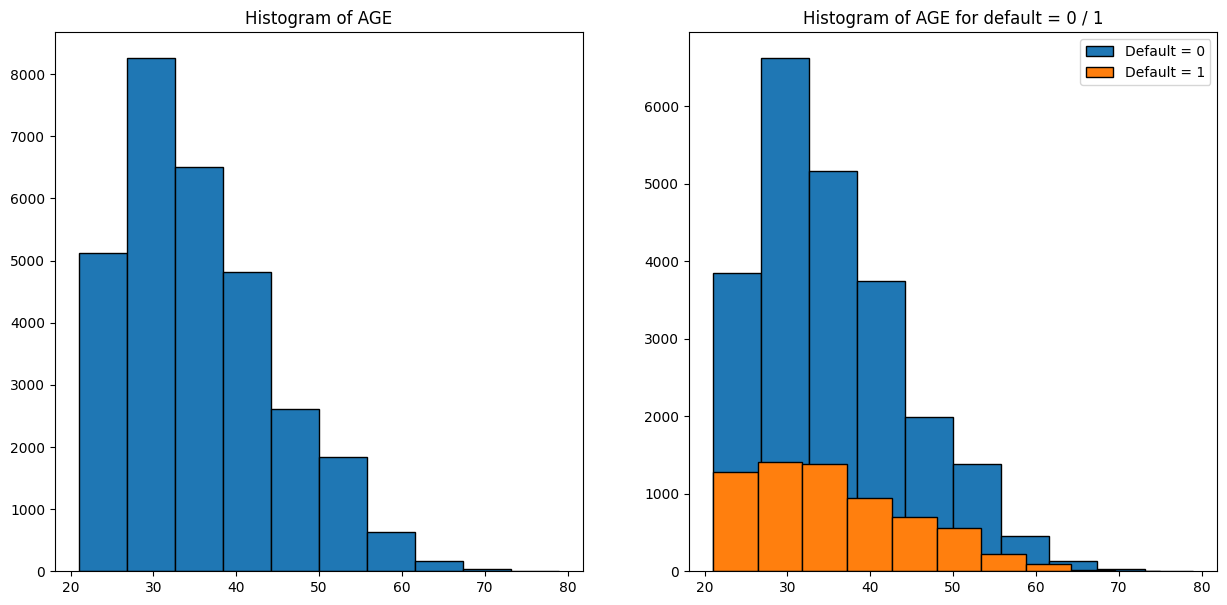

In [79]:
#histogram of AGE distribution
plt.figure(1, figsize=(15,7))

plt.subplot(121)
plt.title('Histogram of AGE')
plt.hist(df['AGE'], edgecolor='k')

plt.subplot(122)
plt.title('Histogram of AGE for default = 0 / 1')
plt.hist(df.AGE.loc[df.default == 0], edgecolor='k', label='Default = 0')
plt.hist(df.AGE.loc[df.default == 1], edgecolor='k', label='Default = 1')
plt.legend()

20 տարեկանում վարկ վերցրածների ու այն մարողների մասնաբաժինը պակաս է, քան վարկը չմարողների տեսակարար կշիռը։

In [87]:
age_0 = df.AGE.loc[df.default == 0]
age_1 = df.AGE.loc[df.default == 1]

print('Median AGE for default = 0: %.0f' % age_0.median())
print('Median AGE for default = 1: %.0f' % age_1.median())

Median AGE for default = 0: 34
Median AGE for default = 1: 34


միջին արժեքները չեն տարբերվում.

In [88]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [89]:
np.random.seed(0)

age_0_bs_med = list(map(np.median, get_bootstrap_samples(age_0.values, 100)))
age_1_bs_med = list(map(np.median, get_bootstrap_samples(age_1.values, 100)))

bnd_0 = stat_intervals(age_0_bs_med, 0.05)
bnd_1 = stat_intervals(age_1_bs_med, 0.05)

print('Conf. int. median AGE for default = 0: [%f, %f]' % (bnd_0[0], bnd_0[1]))
print('Conf. int. median AGE for default = 1: [%f, %f]' % (bnd_1[0], bnd_1[1]))

Conf. int. median AGE for default = 0: [34.000000, 34.000000]
Conf. int. median AGE for default = 1: [34.000000, 35.000000]


In [90]:
print('Difference between medians: %f' % (np.median(age_0) - np.median(age_1)))

Difference between medians: 0.000000


H0. նմուշների բաշխումները լիովին հավասար են\
H1. նմուշների բաշխումները տարբերվում են ըստ հերթափոխի քանակի

In [91]:
delta_median_scores = list(map(lambda x: x[1] - x[0], zip(age_0_bs_med, age_1_bs_med)))
stat_int = stat_intervals(delta_median_scores, 0.05)
print('95%% conf. int. for the difference between medians: [%f, %f]' % (stat_int[0], stat_int[1]))

95% conf. int. for the difference between medians: [0.000000, 1.000000]


In [92]:
print('p-value: %f' % permutation_test(age_0, age_1, max_permutations=1000))

p-value: 0.014000


p-value-ն բավականին փոքր է, և զրոյական վարկածը մերժվում է 0,05 նշանակալիության մակարդակում: